<a href="https://colab.research.google.com/github/scholargj/SRET-INT200-JUNE2021/blob/master/07July2021DjangoRESTAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Full stack Web Development  - Django REST API - GET, POST, PUT, DELETE**


Authored by

# ***Dr. Jayanthi Ganapathy***

The following technologies will be used in developing a web site 

1.   SQLite for database
2.   Python-Django for backend
3.   Angular10 for frontend  


Angular (frontend) will communicate with Django REST API (backend)

Django is Python based and it runs on server side. Angular is a framework used for designing UI in single page web applications.

SQLite is database


# **Prerequisites**

Software requirements
1.	Visual Studio Code
2.	POSTMAN.
3.	Python.
4.	Virtual Environments
5.	Install Django REST Framework.  
6.	Launch Django Project.
7.	SQLite DB File. 
8.	Enabling security access using Cross-Origin Resource Sharing (CORS)

**Note:** 

1. For installation of node JS and Angular CLI, [Click here](https://github.com/scholargj/SRET-INT200-JUNE2021/blob/master/Getting_started_with_Angular_.ipynb)

2. [Click here to download Visual Studio Code](https://code.visualstudio.com/download) and Install.
2. This notebook will explain the steps involved in installing the software and setting up the environment for development.

The default template for the project consists of following files:

•	**manage.py** is command line utility that helps in interacting with Django project. This is available to serve Django project.

•	**db.sqlite3** is database file used to store data.

•	**__init__.py** is empty here and it is considered as python module for the project.

•	**settings.py** files consist of default settings and configurations that are required for running this project.

•	**urls.py** contains all url declarations for this Django project.

•	**asgi.py** is the entry point for Asynchronous Server Gateway Interface (ASGI) compatible web servers to serve the project.

•	**wsgi.py** is the entry point for Web Server Gateway Interface (WSGI) compatible web servers.


# **1. Create a Django Application**

1. Start the virtual environment **env1**

`python manage.py startapp EmployeeApp`

In [ ]:
(env1) F:\DjangoAngular\FirstAPI>
(env1) F:\DjangoAngular\FirstAPI>python manage.py startapp EmployeeApp

# **2. Register the application**

The **`apps.py`** file has the following code.


In [ ]:
from django.apps import AppConfig


class EmployeeappConfig(AppConfig):
    default_auto_field = 'django.db.models.BigAutoField'
    name = 'EmployeeApp'

**`settings.py`**

In [ ]:
# Application definition

INSTALLED_APPS = [
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
    'corsheaders',
    'EmployeeApp.apps.EmployeeappConfig',
    'rest_framework'
]
CORS_ORIGIN_ALLOW_ALL = True

MIDDLEWARE = [
    'corsheaders.middleware.CorsMiddleware',
    'django.middleware.security.SecurityMiddleware',
    'django.contrib.sessions.middleware.SessionMiddleware',
    'django.middleware.common.CommonMiddleware',
    'django.middleware.csrf.CsrfViewMiddleware',
    'django.contrib.auth.middleware.AuthenticationMiddleware',
    'django.contrib.messages.middleware.MessageMiddleware',
    'django.middleware.clickjacking.XFrameOptionsMiddleware',
]

# **3. Create Data models for the application** 

It is required to create two models.
1. Employee Data
2. Department Data

**`models.py`**

In [ ]:
from django.db import models

# Create your models here.
class Departments(models.Model):
    DepartmentId = models.AutoField(primary_key=True)
    DepartmentName = models.CharField(max_length=100)
class Employees(models.Model):
    EmployeeId = models.AutoField(primary_key=True)
    EmployeeName = models.CharField(max_length=100)
    Department = models.CharField(max_length=100)
    DateOfJoining = models.DateField()
    PhotoFileName = models.CharField(max_length=100)


# **4. Commands to create files in SQLite Database**


Create files in SQLite database file.

**`python manage.py makemigrations EmployeeApp`**

In [ ]:
(env1) F:\DjangoAngular\FirstAPI>python manage.py makemigrations EmployeeApp
Migrations for 'EmployeeApp':
  EmployeeApp\migrations\0001_initial.py
    - Create model Department
    - Create model Employees

(env1) F:\DjangoAngular\FirstAPI>

#**5 Command to commit changes to database file**
**`python manage.py migrate EmployeeApp`**

This command creates an intermediate file in migrations folder


In [ ]:
(env1) F:\DjangoAngular\FirstAPI>python manage.py migrate EmployeeApp
Operations to perform:
  Apply all migrations: EmployeeApp
Running migrations:
  Applying EmployeeApp.0001_initial... OK


#**6 Refresh the database**

**Database --> AddDatabase**

Two tables are created successfully

```
EmployeeApp_departments
EmployeeApp_employees
```

Write select query to check the data

`select * from EmployeeApp_departments`

`select * from EmployeeApp_employees`

**currently no data**

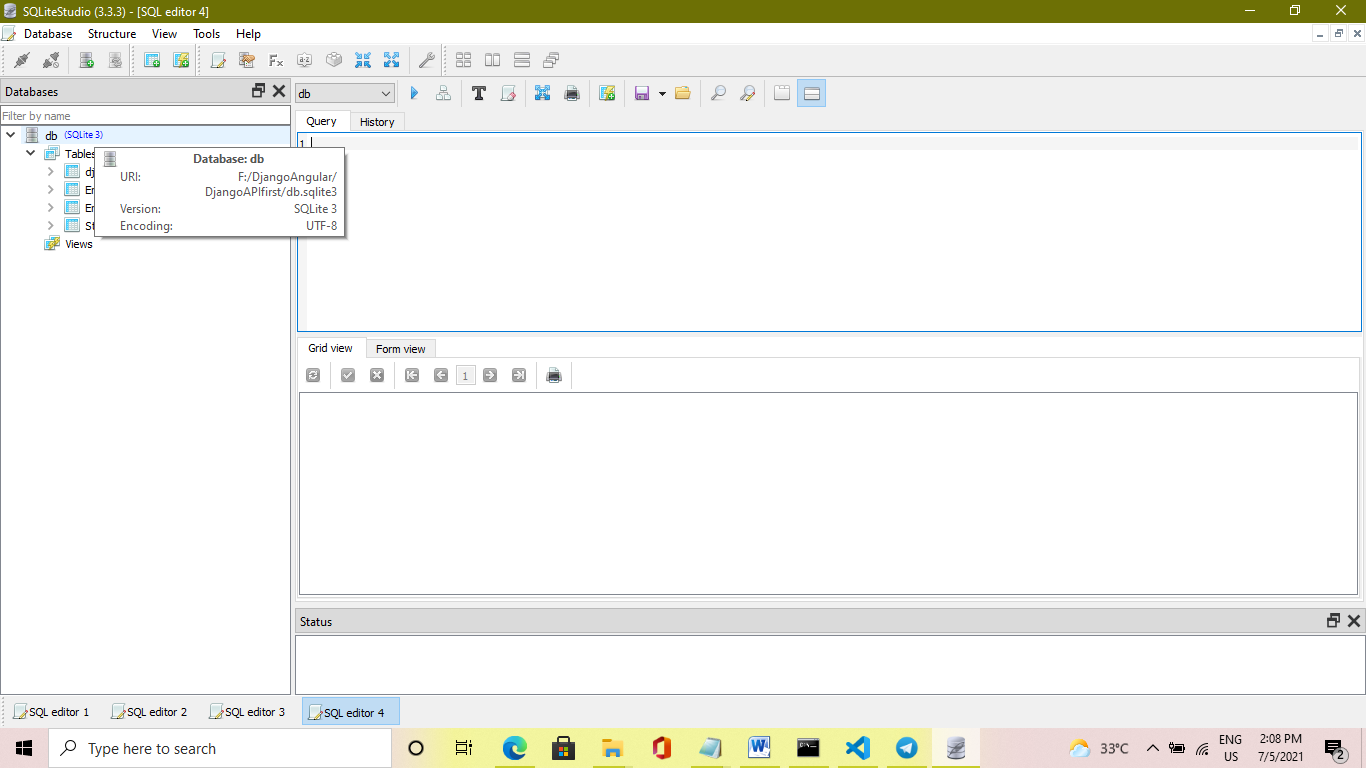

The tables are created as shown below.

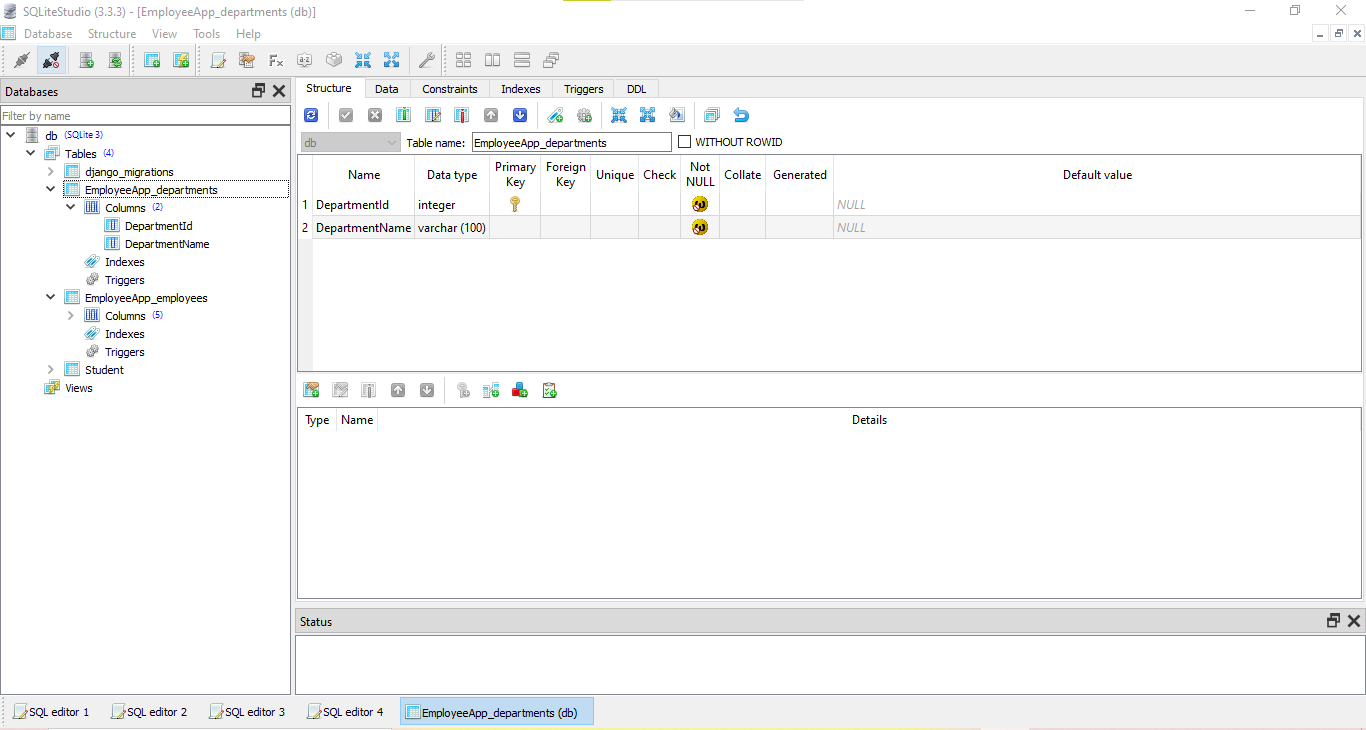

# **7. Add a Serializer**

Serialization helps in converting complex datatypes or models instance into python native types that can then be easily rendered in to JSON or XML or other content types. They also help in deserialisation where they convert the passed data back to complex types

Create a new file `serializers.py` in EmployeeApp. Add the code given below.

The code for **`serializers.py`** file 

In [ ]:
from rest_framework import serializers
from EmployeeApp.models import Departments, Employees


class DepartmentSerializer(serializers.ModelSerializer):
    class Meta:
        model = Departments
        fields = ('DepartmentId',
                'DepartmentName')

class EmployeeSerializer(serializers.ModelSerializer):
    class Meta:
        model = Employees
        fields = ('EmployeeId',
                  'EmployeeName',
                  'Department',
                  'DateOfJoining',
                  'PhotoFileName')

# **8. Develop API methods GET, PUT, POST and DELETE for Department**


To develop API methods for Department.

1. importing `csrf_exempt` decorating allow frontend apps to easily access our API domains JSON parser to parse data to incoming data to datamodel.

2. Import both the models also corresponding serializer classes.

3. write a **GET** method that will return data in JSON format. Serialiser convert into JSON format the parameter **safe = FALSE** is set to convey Django project JSON format is valid format and it is fine. 

4. **POST** methods inserts new record into department table. Parser converts into JSON format and use serializer to convert into model type. Finally check the model is valid. If it is valid save into database and return success message. if not return failure message

5. Next develop **PUT** method to update the existing record. First capture the  existing record to database using department ID next map with new values using serializer class. finally if model is valid, save and return success message.

6. Finally complete the **DELETE** method. For delete method send the department id in the URL. It is used to retrieve records from database using passed id and then delete from database.

**`views.py`**

In [ ]:
from django.shortcuts import render
from django.views.decorators.csrf import csrf_exempt
from rest_framework.parsers import JSONParser
from django.http.response import JsonResponse
from EmployeeApp.models import Departments, Employees
from EmployeeApp.serializers import DepartmentSerializer, EmployeeSerializer

# Create your views here.
@csrf_exempt
def departmentApi(request, id=0):
    if request.method=='GET':
        departments = Departments.objects.all()
        departments_serializer = DepartmentSerializer(departments, many=True)
        return JsonResponse(departments_serializer.data, safe=False)
    elif request.method=='POST':
            department_data=JSONParser().parse(request)
            department_serializer = DepartmentSerializer(data=department_data)
            if department_serializer.is_valid():
                department_serializer.save()
                return JsonResponse("Addedd Successfully!", safe=False)
            return JsonResponse("Failed to Add.",safe=False)
    elif request.method=='PUT':
            department_data = JSONParser().parse(request)
            department=Departments.objects.get(DepartmentId=department_data['DepartmentId'])
            department_serializer=DepartmentSerializer(department, data=department_data)
            if department_serializer.is_valid():
                department_serializer.save()
                return JsonResponse("Updated Successfully!", safe=False)
            return JsonResponse("Failed to Update.",safe=False)  
    elif request.method=='DELETE':
            department=Departments.object.get(DepartmentId=id)
            department.delete()
            return JsonResponse("Deleted Successfully!!",safe=False)  

**9. Develop API methods GET, PUT, POST and DELETE for Employee**

In [ ]:
@csrf_exempt
def employeeApi(request, id=0):
    if request.method=='GET':
        employees = Employees.objects.all()
        employees_serializer = EmployeeSerializer(employees, many=True)
        return JsonResponse(employees_serializer.data, safe=False)
    elif request.method=='POST':
            employee_data=JSONParser().parse(request)
            employee_serializer = EmployeeSerializer(data=employee_data)
            if employee_serializer.is_valid():
                employee_serializer.save()
                return JsonResponse("Added Successfully!", safe=False)
            return JsonResponse("Failed to Add.",safe=False)

    elif request.method=='PUT':
            employee_data = JSONParser().parse(request)
            employee=Employees.objects.get(EmployeeId=employee_data['EmployeeId'])
            employee_serializer=EmployeeSerializer(employee, data=employee_data)
            if employee_serializer.is_valid():
                employee_serializer.save()
                return JsonResponse("Updated Successfully!", safe=False)
            return JsonResponse("Failed to Update.",safe=False)  
    elif request.method=='DELETE':
            employees=Employees.object.get(EmployeeId=id)
            employees.delete()
            return JsonResponse("Deleted Successfully!!",safe=False)

# **10. API method to Upload Profile Picture**

It is required to store image in a folder.

Create a folder named **media** inside the root folder.

It is required to add keys in **`settings.py`** file

```
from pathlib import Path
import os
```



include the code given below

In [ ]:
MEDIA_URL ='/media/'
MEDIA_ROOT =os.path.join(BASE_DIR,"media")

Code the **`views.py`** file.

Include the import statement given below in **`views.py`** file.

`from django.core.files.storage import default_storage`

In [ ]:
#This method is required for saving Profile picture
@csrf_exempt
def SaveFile(request):
    file=request.FILES['uploadedFile']
    file_name=default_storage.save(file.name,file)
    return JsonResponse(file_name,safe=False)

Code the **`settings.py`** file

In [ ]:
from pathlib import Path
import os

# Build paths inside the project like this: BASE_DIR / 'subdir'.
BASE_DIR = Path(__file__).resolve().parent.parent

MEDIA_URL ='/media/'
MEDIA_ROOT =os.path.join(BASE_DIR,"media")

# **11. create url for accessing the data**

Create a new file **`urls.py`** in EmployeeApp folder and 
Code the file **`urls.py`** as given below.

In [ ]:
from django.conf.urls import url
from EmployeeApp import views

from django.conf.urls.static import static
from django.conf import settings


urlpatterns = [
url(r'departments/$',views.departmentApi),
url(r'^departments/([0-9]+)$',views.departmentApi),

url(r'employee/$',views.employeeApi),
url(r'^employee/([0-9]+)$',views.employeeApi),

url(r'^SaveFile$', views.SaveFile)
] + static(settings.MEDIA_URL, document_root=settings.MEDIA_ROOT)


Link the **`urls.py`**in **`EmployeeApp`** with **`urls.py`** in **`DjangoAPIfirst`** which is the root folder

In [ ]:
"""DjangoAPIfirst URL Configuration

The `urlpatterns` list routes URLs to views. For more information please see:
    https://docs.djangoproject.com/en/3.2/topics/http/urls/
Examples:
Function views
    1. Add an import:  from my_app import views
    2. Add a URL to urlpatterns:  path('', views.home, name='home')
Class-based views
    1. Add an import:  from other_app.views import Home
    2. Add a URL to urlpatterns:  path('', Home.as_view(), name='home')
Including another URLconf
    1. Import the include() function: from django.urls import include, path
    2. Add a URL to urlpatterns:  path('blog/', include('blog.urls'))
"""
from django.contrib import admin
from django.urls import path

from django.conf.urls import url, include
urlpatterns = [
    path('admin/', admin.site.urls),
    url(r'^',include('EmployeeApp.urls'))
]


Run Django project **`python manage.py runserver`**

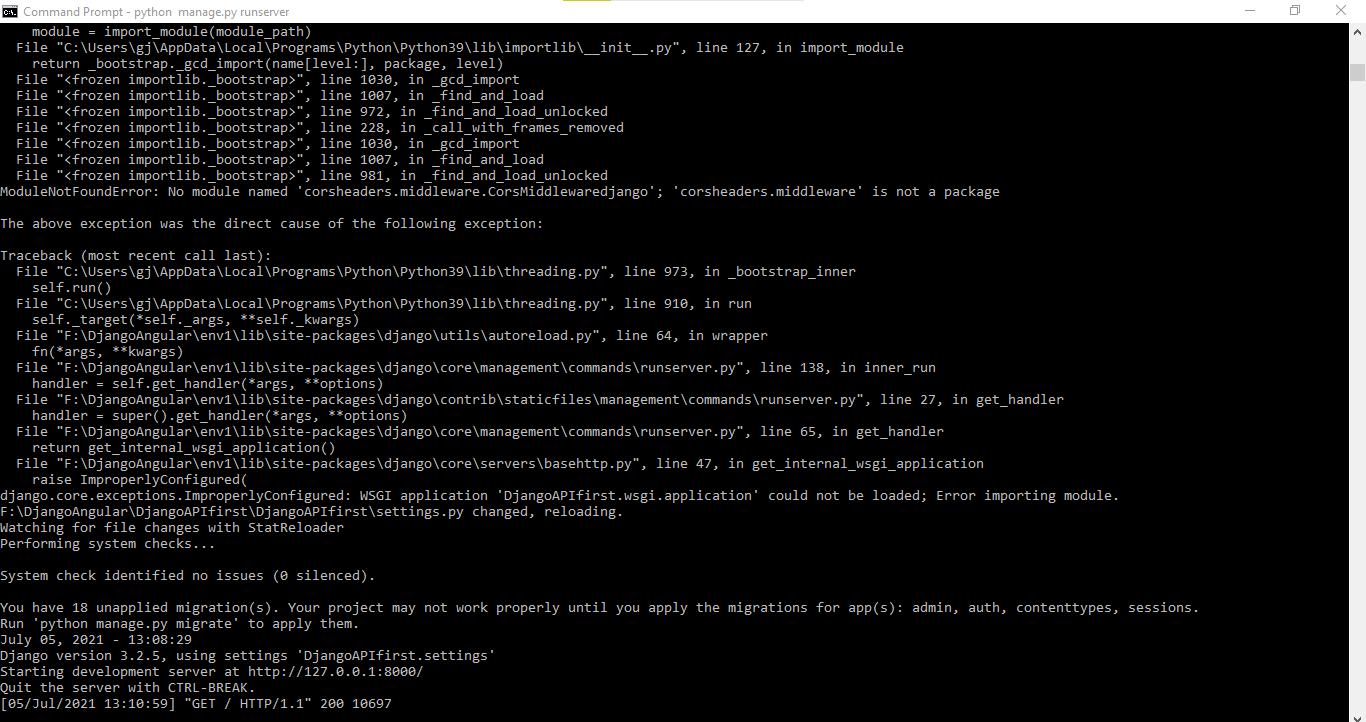

Open **POSTMAN** to see the records

Select **NEW --> HTTP** request

Given the server name **`http://127.0.0.1:8000/`**

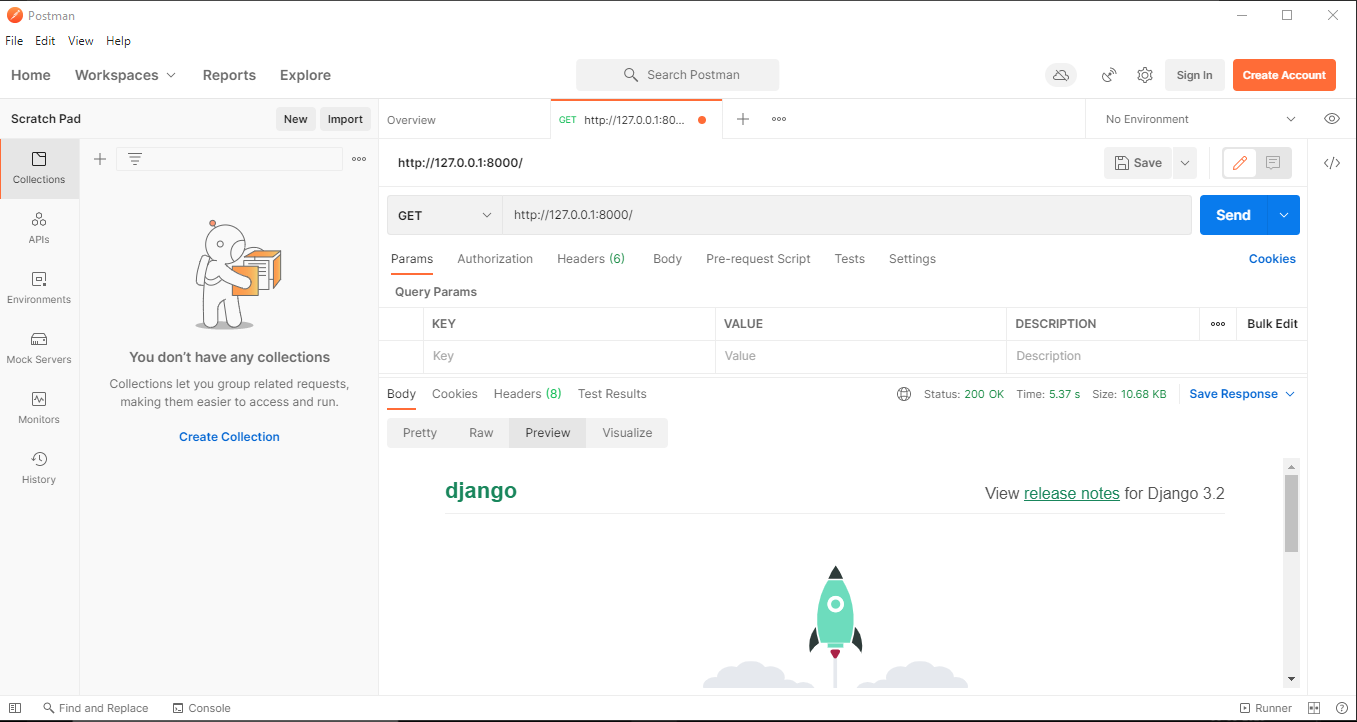

# **References**

1. https://docs.djangoproject.com/en/3.2/
2. https://www.postman.com/
3. https://www.python.org/
4. https://pypi.org/project/django-cors-headers/